# Northwind Analysis with pandas Example

## Pre-Reqs
You will need to perform the following: <br>
<ul>
    <li>Install Microsoft SQL Server Management Studio: <a href="https://learn.microsoft.com/en-us/sql/ssms/download-sql-server-management-studio-ssms?view=sql-server-ver16">https://learn.microsoft.com/en-us/sql/ssms/download-sql-server-management-studio-ssms?view=sql-server-ver16</a> </li>
    <li>Create the Northwind Database: <a href="https://github.com/Microsoft/sql-server-samples/tree/master/samples/databases/northwind-pubs">https://github.com/Microsoft/sql-server-samples/tree/master/samples/databases/northwind-pubs"</a></li>
</ul>

This will be the same example but with pandas for the analysis only

In [1]:
import os
import sys
sys.path.append(os.path.realpath('..'))
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
from configuration.config import DB_HOST #you will need to create this. It is not recommended to store any server credentials in a Github repo

In [2]:
engine = create_engine(f"mssql+pymssql://{DB_HOST}/Northwind")

## Import all our data

In [3]:
customers = pd.read_sql("SELECT * FROM Customers", con = engine)
orders = pd.read_sql("SELECT * FROM Orders", con = engine)
order_details = pd.read_sql("SELECT * FROM [Order Details]", con = engine)
products = pd.read_sql("SELECT * FROM Products", con = engine)
categories= pd.read_sql("SELECT * FROM Categories", con = engine)

## Take a peek at our data

In [4]:
customers.head()

,CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
0,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,None,12209,Germany,030-0074321,030-0076545
1,ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,México D.F.,None,05021,Mexico,(5) 555-4729,(5) 555-3745
2,ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,None,05023,Mexico,(5) 555-3932,None
3,AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,London,None,WA1 1DP,UK,(171) 555-7788,(171) 555-6750
4,BERGS,Berglunds snabbköp,Christina Berglund,Order Administrator,Berguvsvägen 8,Luleå,None,S-958 22,Sweden,0921-12 34 65,0921-12 34 67


In [5]:
orders.head()

,OrderID,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,None,51100,France
1,10249,TOMSP,6,1996-07-05,1996-08-16,1996-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,None,44087,Germany
2,10250,HANAR,4,1996-07-08,1996-08-05,1996-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,RJ,05454-876,Brazil
3,10251,VICTE,3,1996-07-08,1996-08-05,1996-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,None,69004,France
4,10252,SUPRD,4,1996-07-09,1996-08-06,1996-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,None,B-6000,Belgium


In [6]:
order_details.head()

,OrderID,ProductID,UnitPrice,Quantity,Discount
0,10248,11,14.0,12,0.0
1,10248,42,9.8,10,0.0
2,10248,72,34.8,5,0.0
3,10249,14,18.6,9,0.0
4,10249,51,42.4,40,0.0


In [7]:
products.head()

,ProductID,ProductName,SupplierID,CategoryID,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,1,1,10 boxes x 20 bags,18.00,39,0,10,False
1,2,Chang,1,1,24 - 12 oz bottles,19.00,17,40,25,False
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.00,13,70,25,False
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.00,53,0,0,False
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,True


In [8]:
categories.head()

,CategoryID,CategoryName,Description,Picture
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales","b""\x15\x1c/\x00\x02\x00\x00\x00\r\x00\x0e\x00\..."
1,2,Condiments,"Sweet and savory sauces, relishes, spreads, an...","b""\x15\x1c/\x00\x02\x00\x00\x00\r\x00\x0e\x00\..."
2,3,Confections,"Desserts, candies, and sweet breads","b""\x15\x1c/\x00\x02\x00\x00\x00\r\x00\x0e\x00\..."
3,4,Dairy Products,Cheeses,b'\x15\x1c/\x00\x02\x00\x00\x00\r\x00\x0e\x00\...
4,5,Grains/Cereals,"Breads, crackers, pasta, and cereal",b'\x15\x1c/\x00\x02\x00\x00\x00\r\x00\x0e\x00\...


In [9]:
categories.columns

Index(['CategoryID', 'CategoryName', 'Description', 'Picture'], dtype='object')

## What timeframe is our data in?

In [10]:
print(f"Our data timeframe is between {min(orders['OrderDate'])} and {max(orders['OrderDate'])}.")

Our data timeframe is between 1996-07-04 00:00:00 and 1998-05-06 00:00:00.


## How many products did we sell by category during the entire timeframe?
Here you will see how complicated this can get using pandas alone.
As you can see, the multiple merges can get complicated

In [11]:
sold_by_category_overall = order_details[['OrderID', 'ProductID']].merge(products[['ProductID', 'CategoryID']], on = 'ProductID').merge(categories[['CategoryID', 'CategoryName']], on = 'CategoryID')

In [12]:
sold_by_category_overall_final = pd.pivot_table(sold_by_category_overall, index = 'CategoryName', values = ['OrderID'], aggfunc = 'count')

In [13]:
sold_by_category_overall_final.columns = ['Items Sold']
sold_by_category_overall_final.index.name = 'Category'

In [14]:
sold_by_category_overall_final

,Items Sold
Category,
Beverages,404
Condiments,216
Confections,334
Dairy Products,366
Grains/Cereals,196
Meat/Poultry,173
Produce,136
Seafood,330


<Axes: title={'center': 'Items Sold by Category 1996-1998'}, xlabel='Category', ylabel='Items Sold'>

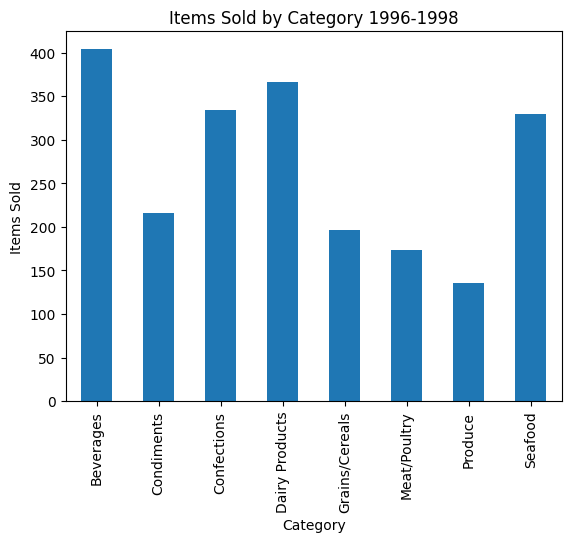

In [15]:
sold_by_category_overall_final.plot(kind = 'bar', xlabel = sold_by_category_overall_final.index.name, ylabel = 'Items Sold', title = 'Items Sold by Category 1996-1998', legend = False )

We could have formed the final dataframe all in one line, but this would reduce readability

In [16]:
order_details[['OrderID', 'ProductID']].merge(products[['ProductID', 'CategoryID']], on = 'ProductID').merge(categories[['CategoryID', 'CategoryName']], on = 'CategoryID').pivot_table(index = 'CategoryName', values = ['OrderID'], aggfunc = 'count')

,OrderID
CategoryName,
Beverages,404
Condiments,216
Confections,334
Dairy Products,366
Grains/Cereals,196
Meat/Poultry,173
Produce,136
Seafood,330
